# Related equations that you will encounter in civil engineering

During your master's program, you will encounter some of the following equations, often solved with the FDM (with examples):

- Heat conduction equation for materials: crucial for designing temperature control systems in buildings, predicting concrete curing, and analyzing the behavior of geothermal systems.
- Stress-strain equation for structural loading: essential for designing safe buildings, bridges, etc., to withstand long-term environmental and operational loads.
- Navier-Stokes equations for fluid flow: for designing water supply systems, drainage networks, and simulating groundwater flow in geotechnical engineering.
- Advection-diffusion equation for pollutant dispersion: omnipresent in the analysis of civil contamination spread, design effective wastewater treatment systems, and assessment of environmental impact.
- Wave equation: for modeling seismic waves and their effect on structures.
- Finite Element Method (FEM): not an equation but a numerical technique closely related to the FDM. It is used for solving complex structural and thermal problems by dividing them into smaller, manageable elements and solving equations for each element.

## Relevance to your master's program/track/discipline (not a complete list but you can find plenty of examples online)

We have prepared this list to emphasize the relevance of the FDM to your program at TU Delft. You may or may not encounter some (or all) of these as this list is not exhaustive.

- Applied earth sciences: groundwater flow modeling, geothermal modeling, and seismic wave propagation.
- Structural engineering: stress-strain estimation in structures, heat conduction, and vibration analysis.
- Hydraulic engineering: simulating coastal and river hydrodynamics, sediment transport, and erosion.
- Transport engineering: simulating traffic flow, congestion patterns, optimizing traffic signals, public transport planning, and pedestrian/bicycle flow.
- Environmental engineering: dispersion of air pollutants in air and water, groundwater flow modeling, gas generation in landfills, environmental contamination, forecasting weather and extreme events, and studying climate change and its impact.
- Offshore engineering: wave and wind loading and often combined with the finite volume method (FVM) for more detailed fluid analysis, FEM for detailed structural analysis, and many times, a combination of FVM and FEM for fluid-structure interaction (FSI).
- Sanitary engineering and urban water infrastructure: designing wastewater treatment plants, sewer system layout, water quality analysis, and demand forecasting.

To summarize, the FDM is omnipresent and essential for all tracks in civil engineering. Some of you may not have to use it directly for whatever you pursue later, but you may encounter a computer code that is based on the FDM. In such a situation, a fundamental understanding of the FDM, especially the underlying mathematics, is essential for not using the code like a 'black box'.

This is what we intend to impart in week 1.6.


## Objective and suggestions for Week 1.6 FDE

- The objective is to familiarize oneself with the discretization of differential equations, estimating relevant derivatives using the Taylor series and setting up a numerical solver.
- The week involves mathematics, so while you navigate through the content, please remember that mathematics begins with a pen and paper.
- The textbook provides simple details on the lecture’s content. Please use the recordings as the main source of information.
- There is ample learning material available online (and in the library). We suggest using videos instead of books as they are more effective.


# Approximating numerical derivatives

Important things to retain from this block:
Be able to combine different Taylor series expansions to get different derivative approximations (Forward Euler, Backward Euler, Central Difference, or even approximations for the second derivative)

In the previous week, you learned about the Taylor series that approximates a function using a sum of its derivatives. In this week, we will use the same expression but instead of estimating the function, we will use the known values of the function to estimate the derivatives. In doing so, we can convert the derivatives in a differential (partial) equation to algebraic expressions, which can then be solved more easily than a differential equation.

Consider the Taylor series expansion for a continuous and infinitely differentiable function $f(x)$ at $x$ with an infinitesimally small increment $h$ (positive), in both directions along the $x$-axis.
$$
\begin{split}
\begin{cases}
f(x+h)=f(x)+hf'(x)+\dfrac{h^2}{2}f''(x)+\dfrac{h^3}{6}f^{(3)}(x) + \mathcal{O}(h^4) \Leftrightarrow f'(x) \approx \dfrac{f(x)-f(x-h)}{h}\\
f(x-h)=f(x)-hf'(x)+\dfrac{h^2}{2}f''(x)-\dfrac{h^3}{6}f^{(3)}(x) + \mathcal{O}(h^4) \Leftrightarrow f'(x) \approx \dfrac{f(x+h)-f(x)}{h}
\end{cases}
\end{split}
$$

In the formulae shown above, the upper one is the Forward Euler scheme and the lower one is the Backward Euler scheme. In both cases, the first derivative has been approximated using the known values of the function at points $x$, $x-h$, and $x+h$.

Let’s take a step further and combine the two Taylor series expansions to get the Central Difference approximation of the first derivative. Do you notice the difference?

$$f'(x) \approx \frac{f(x+h)-f(x-h)}{2h}$$

And yet another step further, subtract the two Taylor series expansions, to get an approximation for the second derivative as a combination of three known values of the function $f$.

$$f''(x) \approx \frac{f(x+h)-2f(x)+f(x-h)}{h^2}$$

You would have noticed that the approximations require dropping off a lot of terms (infinite to be exact) from the Taylor series expansion, which is only an exact representation of the function when it contains those infinite terms. This drop-off will lead to an


## Truncation error

Let’s go back to the equation for the Backward Euler scheme to estimate the error that accompanies the scheme.

$$ \left[ f(x+h)=f(x)+hf'(x)+\dfrac{h^2}{2}f''(x)+\dfrac{h^3}{6}f^{(3)}(x) + \mathcal{O}(h^4) \right] $$

$$\left[
f'(x) = \frac{f(x)-f(x-h)}{h}+\dfrac{h}{2}f''(x)+\dfrac{h^2}{6}f^{(3)}(x) + \mathcal{O}(h^3)
\right]$$

One can use the above equations to write:

$$\left[
\left|f'(x)-\frac{f(x)-f(x-h)}{h}\right|\leq\frac{h}{2}|f''(x)|
\right]$$

Using the above procedure, one obtains the following definitions of the truncation errors related to the previously-described approximations.

**Forward Euler**

$$\left[
\left|f'(x)-\frac{f(x+h)-f(x)}{h}\right|\leq\frac{h}{2}|f''(x)|
\right]$$

**Central Difference**

$$\left[
\left|f'(x)-\frac{f(x+h)-f(x-h)}{2h}\right|\leq\frac{h^2}{6}|f^{(3)}(x)|
\right]$$

**Second-derivative approximation**

$$\left[
\left|f''(x)-\frac{f(x+h)-2f(x)+f(x-h)}{h^2}\right|\leq\frac{h^2}{12}|f^{(4)}(x)|
\right]$$

## Order of accuracy

Take a look at the truncation errors described above, and you will notice that they are all functions of the discrete spatial step, $h$. Given both sides of the equations comprise an 'absolute value (positive),' the error increases monotonically with the step, $h$. However, you would have also noticed that h may have an exponent that is not unity. This exponent is called the method’s order of accuracy.

One can now summarize that the Backward and Forward Euler methods are first-order accurate, while the central difference scheme and the approximation of the second derivative are second-order accurate. But what does the order of accuracy actually mean?

It defines 'the rate' at which the truncation error goes towards zero with a reduction in the step, $h$. The truncation error of a higher-order method converges faster to zero. You'll learn more about it as part of this week’s project (Friday).it as part of this week’s project (Friday).


# Simple solvers for Ordinary Differential Equations (ODE)

Important things to retain from this block:

- Understand that numerical solutions for ODEs can be computed either by numerical integration or derivatives.
- Understand the stability criteria for the numerical solutions.

ODEs can be solved via numerical integration or with numerical derivatives. This section describes these two approaches and discusses the concept of stability with respect to numerical solvers.

## Solving an ODE with numerical integration

Consider the following equation wherein the function f is being integrated in time to estimate the value of y at time t, starting with the value of y at time t0.

$$\left[
y(t)=y(t_0)+\int_{t_0}^tf(\tau,y(\tau))d\tau
\right]$$

A simple calculation (similar to the Forward Euler scheme), indicates that the function $f$ is, in fact, the derivative of the unknown variable $y$. Now, let’s introduce a discrete time interval $[tn, tn+1]$.

$$\left[
y(t_{n+1})=y(t_n)+\int_{t_n}^{t_{n+1}}f(\tau,y(\tau))d\tau
\right]$$

If you recall the Left Riemann integration from the previous week, you can obtain an explicit equation:

$$\left[
y(t_{n+1})=y(t_n)+\Delta tf(t_{n},y(t_{n}))
\right]$$

Similarly, the Right Riemann integration leads to an implicit equation:

$$\left[
y(t_{n+1})=y(t_n)+\Delta tf(t_{n+1},y(t_{n+1}))
\right]$$

An explicit equation can be solved directly, but an implicit equation requires an iterative solver. You’ll see that as part of the tutorial (Wednesday) and the project (Friday).

## Solving an ODE by establishing the numerical derivatives

The equation below was spoken of during the lecture. It’s the simplest form of a Cauchy initial value problem for an initial condition $y(t_0) = y_0$.

$$\left[
y'-f(t,y)=0
\right]$$

Introduce a uniform grid (consider t as a general independent variable).

$$\left[
t_n = t_0 + nh, \hspace{50px} y(t_n)=y_n
\right]$$

For a small $h$, the Forward Euler approximation reads:

$$\left[
\frac{y_{n+1}-y_n}{h} - f(t_n, y_n) = y'(t_n)+\frac{h}{2}y''(t_n)+\mathcal{O}(h^2)-f(t_n,y_n) = \mathcal{O}(h)
\right]$$

Where the symbols have the previously-defined meanings. In practical terms,

$$\left[
\frac{y_{n+1}-y_n}{h} = f(t_n, y_n), \hspace{50px} y(t_0)=y_0
\right]$$

Can you guess what’s the order of accuracy of this approximation of the Cauchy initial value problem?
acy of this approximation of the Cauchy initial value problem?


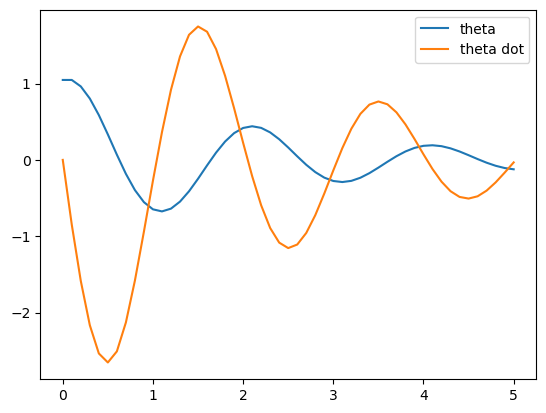

In [3]:
import numpy as np
import matplotlib.pyplot as plt

N = 10        # in how much sub pieces we should break a 1sec interval
T = 5          # total duration of the simulation
dt = 1 / N      # dt
g = 9.81        # acceleration of gravity
L = 1           # pendulum rope length
k = 0.8         # air resistance coefficient
m = 1           # mass of the pendulum

theta = [np.pi / 3]     # initial angle
theta_dot = [0]         # initial angular velocity
t = [0]

for i in range(N * T):
    theta.append(theta_dot[-1] * dt + theta[-1])
    theta_dot.append(theta_dot[-1] - theta_dot[-1] * dt * k / m - np.sin(theta[-1]) * dt * g / L)   
    t.append((i + 1) * dt)

plt.plot(t, theta, label='theta')
plt.plot(t, theta_dot, label='theta dot')
plt.legend()
plt.show()
